# Homework 1

In this homework, we will go through the basic data processing and analysis tasks based on a TCGA dataset. 

Source study: https://www.cbioportal.org/study/summary?id=msk_impact_2017


In [1]:

import pandas as pd
import numpy as np
import os

/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Q1. Data loading and processing

We have three tables prepared, named
- `./data/gene_expression_rna.xena`: the gene expression dataset
- `./data/gene_mutation_dna.xena`: the gene mutation dataset
- `./data/diagnosis_outcome.xena`: the patient clinical data dataset

## Q1.1. Reindex and transpose the dataframe

Given a gene expression dataset where:

The columns represent sample indices (patients).
The first column contains the names of RNA sequences.
To proceed with further analysis, we need to transpose the DataFrame so that:

There is a column named "sample" containing all the sample IDs.
The other columns represent the RNA names.
Each row corresponds to the expression values for each RNA.
Write the code to perform this transformation.

In [2]:
# load gene expression data
data_dir = "./data"
df_exp = pd.read_csv(os.path.join(data_dir, "gene_expression_rna_sub.xena"), sep="\t")
df_exp

,sample,TCGA-UY-A78P-01,TCGA-DD-A4NL-01,TCGA-F7-A624-01,TCGA-AD-6548-01,TCGA-CM-6165-01,TCGA-D3-A51N-06,TCGA-E2-A1B1-01,TCGA-DU-5853-01,TCGA-OR-A5LC-01,...,TCGA-AB-2913-03,TCGA-B0-5075-01,TCGA-AB-2929-03,TCGA-AB-3001-03,TCGA-AB-2955-03,TCGA-95-A4VP-01,TCGA-CV-6433-01,TCGA-KO-8414-01,TCGA-EX-A8YF-01,TCGA-EL-A4KG-01
0,LEKR1,3.45,3.03,2.28,4.12,3.68,5.41,4.63,4.34,3.72,...,5.04,4.51,3.57,3.27,4.47,2.05,4.34,1.94,2.94,4.80
1,MAFG,9.12,8.10,8.65,10.37,9.85,10.24,7.83,9.59,9.07,...,10.69,9.74,11.37,11.93,10.87,9.03,9.33,9.82,9.26,8.93
2,VWA1,11.79,12.66,7.96,11.45,10.13,11.10,9.29,9.10,10.69,...,5.32,9.89,5.83,6.49,0.95,12.35,9.84,9.74,9.80,10.91
3,TCP10L2,0.00,2.35,0.00,2.23,1.31,0.00,0.00,0.00,0.00,...,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
4,NEK11,6.00,3.61,7.56,5.72,7.40,6.89,8.01,8.36,6.73,...,6.78,7.33,6.14,5.28,5.06,6.24,7.53,2.98,8.09,7.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,SUZ12,10.00,9.08,9.52,10.10,10.43,9.01,10.39,9.74,9.59,...,10.95,9.33,10.63,10.83,11.09,8.97,10.46,9.39,10.53,9.56
2997,RCAN3,6.18,4.03,6.05,7.26,6.85,7.52,8.16,4.34,1.60,...,3.50,6.08,6.73,7.44,7.16,5.96,6.72,4.98,7.75,6.72
2998,TTLL1,6.50,5.86,6.69,5.66,6.73,7.83,6.81,8.49,7.33,...,7.89,6.81,7.84,8.30,7.28,6.91,7.01,7.85,5.72,7.72
2999,TP53,9.11,9.73,10.78,10.93,10.96,9.92,10.38,9.79,10.40,...,11.08,10.42,11.14,10.52,10.95,10.46,11.49,8.98,11.21,10.22


In [3]:
# ##############
# your code starts here
# Answer

data_dir = "./data"
df_exp = pd.read_csv(os.path.join(data_dir, "gene_expression_rna_sub.xena"), sep="\t")

# Transpose the dataframe
df_exp = df_exp.set_index('sample').transpose()

# Add a new index column
df_exp.reset_index(inplace=True)
df_exp.rename(columns={'sample': 'index'}, inplace=True)
df_exp.rename(columns={'index': 'sample'}, inplace=True)

df_exp


# ##############

sample,sample,LEKR1,MAFG,VWA1,TCP10L2,NEK11,DHRS4,FXYD7,ATP6AP1L,CARD17,...,C12orf52,GJA3,DIO1,CELSR3,HECTD3,SUZ12,RCAN3,TTLL1,TP53,NKAIN1
0,TCGA-UY-A78P-01,3.45,9.12,11.79,0.00,6.00,9.64,0.61,3.96,2.96,...,9.19,1.63,1.85,5.72,10.24,10.00,6.18,6.50,9.11,0.61
1,TCGA-DD-A4NL-01,3.03,8.10,12.66,2.35,3.61,11.31,1.01,5.07,0.00,...,9.63,1.01,11.07,5.35,10.60,9.08,4.03,5.86,9.73,0.00
2,TCGA-F7-A624-01,2.28,8.65,7.96,0.00,7.56,11.26,0.89,4.00,1.19,...,9.40,1.84,0.51,7.10,10.30,9.52,6.05,6.69,10.78,1.19
3,TCGA-AD-6548-01,4.12,10.37,11.45,2.23,5.72,10.13,1.15,3.73,0.86,...,8.86,1.15,0.49,7.90,10.48,10.10,7.26,5.66,10.93,3.06
4,TCGA-CM-6165-01,3.68,9.85,10.13,1.31,7.40,9.60,1.31,6.08,0.99,...,9.29,3.15,1.57,8.24,10.66,10.43,6.85,6.73,10.96,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,TCGA-95-A4VP-01,2.05,9.03,12.35,0.00,6.24,10.38,2.52,4.31,0.00,...,8.84,1.36,0.00,5.90,10.10,8.97,5.96,6.91,10.46,2.22
1169,TCGA-CV-6433-01,4.34,9.33,9.84,0.00,7.53,9.75,1.40,3.49,1.79,...,8.41,9.10,1.79,8.63,9.68,10.46,6.72,7.01,11.49,1.40
1170,TCGA-KO-8414-01,1.94,9.82,9.74,0.00,2.98,10.56,0.00,6.31,0.00,...,10.03,1.15,0.00,4.49,10.03,9.39,4.98,7.85,8.98,2.74
1171,TCGA-EX-A8YF-01,2.94,9.26,9.80,0.00,8.09,8.35,1.88,6.58,1.48,...,8.93,2.33,1.23,6.91,9.62,10.53,7.75,5.72,11.21,0.53


In [4]:
###### testing script ######
assert len(df_exp) == 1173
assert len(df_exp.columns) == 3002
assert df_exp["sample"][0] == "TCGA-UY-A78P-01"
############################

In [5]:
# load mutation data
df_mutation = pd.read_csv(os.path.join(data_dir, "gene_mutation_dna_sub.xena"), sep="\t")
df_mutation

,sample,TCGA-UY-A78P-01,TCGA-DD-A4NL-01,TCGA-F7-A624-01,TCGA-AD-6548-01,TCGA-CM-6165-01,TCGA-D3-A51N-06,TCGA-E2-A1B1-01,TCGA-DU-5853-01,TCGA-OR-A5LC-01,...,TCGA-FS-A1ZR-06,TCGA-IA-A40U-01,TCGA-WH-A86K-01,TCGA-18-3409-01,TCGA-B0-5075-01,TCGA-95-A4VP-01,TCGA-CV-6433-01,TCGA-KO-8414-01,TCGA-EX-A8YF-01,TCGA-EL-A4KG-01
0,LEKR1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MAFG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VWA1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCP10L2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NEK11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,SUZ12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,RCAN3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2998,TTLL1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999,TP53,1,0,1,1,1,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0


In [6]:
# ##############
# your code starts here
# Answer
data_dir = "./data"
df_mutation = pd.read_csv(os.path.join(data_dir, "gene_mutation_dna_sub.xena"), sep="\t")

df_mutation = df_mutation.set_index('sample').transpose()

# Add a new index column
df_mutation.reset_index(inplace=True)
df_mutation.rename(columns={'index': 'sample'}, inplace=True)

df_mutation

# ##############


sample,sample,LEKR1,MAFG,VWA1,TCP10L2,NEK11,DHRS4,FXYD7,ATP6AP1L,CARD17,...,C12orf52,GJA3,DIO1,CELSR3,HECTD3,SUZ12,RCAN3,TTLL1,TP53,NKAIN1
0,TCGA-UY-A78P-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,TCGA-DD-A4NL-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,TCGA-F7-A624-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,TCGA-AD-6548-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,TCGA-CM-6165-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TCGA-95-A4VP-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,TCGA-CV-6433-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,TCGA-KO-8414-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,TCGA-EX-A8YF-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
###### testing script ######
assert len(df_mutation) == 1000
assert len(df_mutation.columns) == 3002
assert df_mutation["sample"][0] == "TCGA-UY-A78P-01"
############################

In [8]:
# load patient disease diagnosis data
df_diag = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome_sub.xena"), sep="\t")
df_diag

,sample,_PATIENT,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-UY-A78P-01,TCGA-UY-A78P,BLCA,78.0,FEMALE,WHITE,Stage II,NaN,Muscle invasive urothelial carcinoma (pT2 or a...,High Grade,...,NaN,0.0,2380.0,0.0,2380.0,0.0,2380.0,0.0,2380.0,NaN
1,TCGA-DD-A4NL-01,TCGA-DD-A4NL,LIHC,46.0,MALE,WHITE,Stage I,NaN,Hepatocellular Carcinoma,G1,...,R0,0.0,1711.0,0.0,1711.0,0.0,1711.0,0.0,1711.0,NaN
2,TCGA-AB-2809-03,TCGA-AB-2809,LAML,64.0,FEMALE,WHITE,NaN,NaN,NaN,NaN,...,NaN,1.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-F7-A624-01,TCGA-F7-A624,HNSC,73.0,MALE,WHITE,Stage II,NaN,Head & Neck Squamous Cell Carcinoma,G3,...,NaN,0.0,378.0,0.0,378.0,0.0,378.0,0.0,378.0,NaN
4,TCGA-AD-6548-01,TCGA-AD-6548,COAD,81.0,FEMALE,WHITE,Stage I,NaN,Colon Adenocarcinoma,NaN,...,NaN,0.0,650.0,0.0,650.0,0.0,650.0,0.0,650.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,TCGA-CV-6433-01,TCGA-CV-6433,HNSC,57.0,MALE,WHITE,Stage II,Stage II,Head & Neck Squamous Cell Carcinoma,G3,...,NaN,0.0,641.0,0.0,641.0,0.0,641.0,0.0,641.0,NaN
1196,TCGA-KO-8414-01,TCGA-KO-8414,KICH,50.0,FEMALE,WHITE,Stage II,NaN,Kidney Chromophobe,NaN,...,NaN,0.0,3212.0,0.0,3212.0,0.0,3212.0,0.0,3212.0,NaN
1197,TCGA-EX-A8YF-01,TCGA-EX-A8YF,CESC,44.0,FEMALE,WHITE,NaN,Stage IB1,Cervical Squamous Cell Carcinoma,G3,...,NaN,0.0,473.0,0.0,473.0,1.0,396.0,1.0,396.0,NaN
1198,TCGA-AB-2926-03,TCGA-AB-2926,LAML,57.0,FEMALE,WHITE,NaN,NaN,NaN,NaN,...,NaN,1.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q2. EDA


## Q2.1. Data distribution

Given clinical outcome data `df_diag`, determine the distribution of different cancer types. The output should be a DataFrame with the following three columns:

- `Term`: The name of the cancer type.
- `# of Count`: The count of occurrences for each cancer type.
- `Frequency (%)`: The percentage representation of each cancer type within the dataset.

The first row to the last should be the most frequent terms to the least.

Write the code to compute this distribution and create the DataFrame, name it as `output_df`.

In [9]:
df_diag["cancer type abbreviation"]
# output_df = ...

# ##############
# your code starts here
# Answer

# Calculate the distribution of different cancer types
cancer_counts = df_diag["cancer type abbreviation"].value_counts().reset_index()
cancer_counts.columns = ['Term', '# of Counts']

# Calculate the frequency percentage
total_count = cancer_counts['# of Counts'].sum()
cancer_counts['Frequency (%)'] = (cancer_counts['# of Counts'] / total_count) * 100

# Sort the DataFrame by the count in descending order
output_df = cancer_counts.sort_values(by='# of Counts', ascending=False).reset_index(drop=True)

# Display the output DataFrame
print(output_df)

# ##############

    Term  # of Counts  Frequency (%)
0   LAML          200      16.666667
1   BRCA           80       6.666667
2    LGG           71       5.916667
3   PRAD           67       5.583333
4   HNSC           58       4.833333
5   THCA           57       4.750000
6   UCEC           57       4.750000
7   LUSC           55       4.583333
8   LUAD           53       4.416667
9   KIRC           46       3.833333
10  CESC           46       3.833333
11  BLCA           45       3.750000
12  SKCM           45       3.750000
13  LIHC           43       3.583333
14  STAD           38       3.166667
15  KIRP           26       2.166667
16  COAD           25       2.083333
17  SARC           24       2.000000
18   GBM           21       1.750000
19  PCPG           20       1.666667
20  ESCA           20       1.666667
21  PAAD           17       1.416667
22   ACC           13       1.083333
23  TGCT           12       1.000000
24   UVM           11       0.916667
25  KICH           11       0.916667
2

In [10]:
###### testing script ######
assert len(output_df) == 33
assert output_df.columns.tolist() == ["Term", "# of Counts", "Frequency (%)"]
assert output_df.iloc[4]["Term"] == "HNSC"
assert output_df.iloc[5]["# of Counts"] == 57
assert round(output_df.iloc[6]["Frequency (%)"],2) == 4.75
############################

## Q2.2 Number of Samples per Patient

Given a dataset containing clinical data with the columns "_PATIENT" and "sample", determine the ratio of the number of samples per patient. 

The summary DataFrame named `output_df` should have
- `Term`: patient with one/two/three/... samples
- `# of Counts`: number of patients in each group
- `Frequency (%)`: the frequency of patients in each group

In [11]:
df_diag[["_PATIENT", "sample"]]
# output_df = ...


# ##############
# your code starts here
# Answer


# Load the dataset
df_diag = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome_sub.xena"), sep="\t")

# Group by patient and count the number of samples per patient
patient_sample_counts = df_diag.groupby('_PATIENT')['sample'].count().reset_index()
patient_sample_counts.columns = ['_PATIENT', 'Number of Samples']

# Create a summary DataFrame
output_df = patient_sample_counts['Number of Samples'].value_counts().reset_index()
output_df.columns = ['Term', '# of Counts']
output_df['Frequency (%)'] = (output_df['# of Counts'] / output_df['# of Counts'].sum()) * 100

# Sort the summary DataFrame by Term
output_df = output_df.sort_values(by='Term')

# Display the summary DataFrame
output_df



# ##############

,Term,# of Counts,Frequency (%)
0,1,1200,100.0


In [12]:
###### testing script ######
assert len(output_df) == 1
assert output_df.columns.tolist() == ["Term", "# of Counts", "Frequency (%)"]
assert output_df.iloc[0]["# of Counts"] == 1200
assert round(output_df.iloc[0]["Frequency (%)"],2) == 100
############################

## Q2.3. Prevalence of TP53 Gene Mutation Across Cancer Subtypes

Using the mutation data from `df_mutation` and cancer subtype data from `df_diag`, determine the prevalence of the TP53 gene mutation across different cancer subtypes. 

Output the results as a `pd.Series` named `output_df`, ordered by the count of mutations from largest to smallest.

               sample      _PATIENT cancer type abbreviation  \
0     TCGA-UY-A78P-01  TCGA-UY-A78P                     BLCA   
1     TCGA-DD-A4NL-01  TCGA-DD-A4NL                     LIHC   
2     TCGA-AB-2809-03  TCGA-AB-2809                     LAML   
3     TCGA-F7-A624-01  TCGA-F7-A624                     HNSC   
4     TCGA-AD-6548-01  TCGA-AD-6548                     COAD   
...               ...           ...                      ...   
1195  TCGA-CV-6433-01  TCGA-CV-6433                     HNSC   
1196  TCGA-KO-8414-01  TCGA-KO-8414                     KICH   
1197  TCGA-EX-A8YF-01  TCGA-EX-A8YF                     CESC   
1198  TCGA-AB-2926-03  TCGA-AB-2926                     LAML   
1199  TCGA-EL-A4KG-01  TCGA-EL-A4KG                     THCA   

      age_at_initial_pathologic_diagnosis  gender   race  \
0                                    78.0  FEMALE  WHITE   
1                                    46.0    MALE  WHITE   
2                                    64.0  FEMALE  

NameError: name 'plt' is not defined

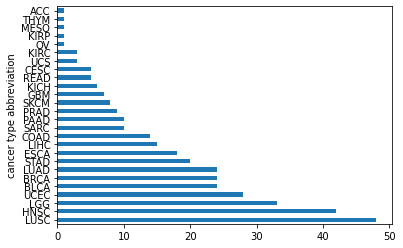

In [13]:
print(df_diag)
df_mutation
# output_df = ...

# ##############
# your code starts here
# Answer


#output_df=df_mutation[["sample","TP53"]].merge(df_diag,on="sample").groupby("cancer type abbreviation")["TP53"].sum().sort_values(ascending=False)
#output_df=output_df[output_df>0]
#output_df


#Q2.3
# Load the data
df_diag = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome_sub.xena"), sep="\t")
df_mutation = pd.read_csv(os.path.join(data_dir, "gene_mutation_dna_sub.xena"), sep="\t")

# Extract the row labeled TP53
tp53_mutations = df_mutation[df_mutation["sample"] == "TP53"]

# Get the sample IDs with TP53 mutations
tp53_samples = tp53_mutations.columns[tp53_mutations.iloc[0] == 1].tolist()

# Get the cancer subtypes for samples with TP53 mutations
cancer_subtypes = df_diag[df_diag["sample"].isin(tp53_samples)]["cancer type abbreviation"]

# Count the occurrences of each cancer subtype
output_df = cancer_subtypes.value_counts()

# Sort the series by the count of mutations from largest to smallest
output_df = output_df.sort_values(ascending=False)

# Plot the results
output_df.plot(kind='barh')
plt.title("TP53 mutational prevalence by cancer subtypes")
plt.ylabel("Frequencies")
plt.xlabel("Cancer Subtypes")
plt.savefig("./tp53_mutational_prevalence.png")
plt.show()

# Display the output series
print(output_df)



# ##############

In [ ]:
###### testing script ######
assert len(output_df) == 26
assert output_df.iloc[1] == 42
############################

# Q3. More EDA

## Q3.1. TP53 Gene Expression Across Cancer Subtypes

Using the gene expression data `df_exp` and cancer subtype data `df_diag`, visualize where the TP53 gene is expressed across top 10 frequent cancer subtypes. The goal is to create a ridge plot that shows the distribution of TP53 expression values for top 10 frequent cancer subtype.

Requirements:
1. Merge the TP53 expression data with the cancer subtype data.
2. Calculate the average TP53 expression value for each cancer subtype.
3. Sort the cancer subtypes based on the average TP53 expression value.
4. Create a list of arrays named `output_ar`, where each array contains the TP53 expression values for one cancer subtype, ordered by the sorted subtypes.
5. Generate a ridge plot using the `output_ar` list.
6. Save the plot as an HTML file named `fig.html`.

Write the code to perform these tasks and generate the ridge plot.

In [ ]:

import sys
print("The location is= ", end=str(sys.path))
import numpy #import the required module
print("The PATH OF THE CURRENT MODULE IS=", end=numpy.__file__)

In [ ]:
!pip install ridgeplot
import ridgeplot as rd

# ##############
# your code starts here
# Answer
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# Filter the data for TP53 gene expression
df_exp_tp53 = df_exp[["sample", "TP53"]]

df_exp_tp53.columns = ['Sample ID', 'TP53']

df_exp_tp53 = df_exp_tp53.iloc[1:]  # Remove the first row which is the gene name

# Merge the dataframes on Sample ID
df_merged = pd.merge(df_diag[['sample', 'cancer type abbreviation']], df_exp_tp53, left_on='sample', right_on='Sample ID')

# Calculate the average TP53 expression for each cancer subtype
avg_tp53 = df_merged.groupby('cancer type abbreviation')['TP53'].mean().reset_index()

# Get the top 10 most frequent cancer subtypes
top_cancer_subtypes = df_diag['cancer type abbreviation'].value_counts().head(10).index
avg_tp53_top = avg_tp53[avg_tp53['cancer type abbreviation'].isin(top_cancer_subtypes)]

# Sort the cancer subtypes by average TP53 expression in descending order
avg_tp53_top_sorted = avg_tp53_top.sort_values(by='TP53', ascending=False)

# Display the result
print(avg_tp53_top_sorted)

# Sort the cancer subtypes based on the average TP53 expression value
sorted_subtypes = avg_tp53_top_sorted.sort_values(by='TP53', ascending=False)['cancer type abbreviation'].tolist()

# Create a list of arrays named output_ar, where each array contains the TP53 expression values for one cancer subtype, ordered by the sorted subtypes
output_ar = [df_merged[df_merged['cancer type abbreviation'] == subtype]['TP53'].values for subtype in sorted_subtypes]


# Generate a ridge plot using the output_ar list
plt.figure(figsize=(10, 8))
for i, subtype in enumerate(avg_tp53_top_sorted['cancer type abbreviation']):
    sns.kdeplot(output_ar[i], label=subtype, fill=True)

plt.title('Ridge Plot of TP53 Expression Values by Cancer Subtype')
plt.xlabel('TP53 Expression')
plt.ylabel('Density')
plt.legend(title='Cancer Subtype')
plt.show()

fig = plt.figure()
fig=rd.ridgeplot(samples=output_ar)
fig.show()
# Save the plot as an HTML file named fig.html
#plt.write_html("fig.html")


# ##############

In [ ]:
###### testing script ######
import numpy as np
assert len(output_ar) == 10
assert abs(np.mean(output_ar[0]) - 11.036491228070176) <= 1e-8
############################

## Q3.2 Survival curve
Using the clinical outcome data `df_diag`, perform a Kaplan-Meier survival analysis to estimate the survival function. 

Output Requirements:
- `mean_survival_time`: The median survival times estimated from the Kaplan-Meier model.
- `kmf_exp`: The fitted Kaplan-Meier model.
- A plot of the survival function.

Write the code to generate these outputs.

/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


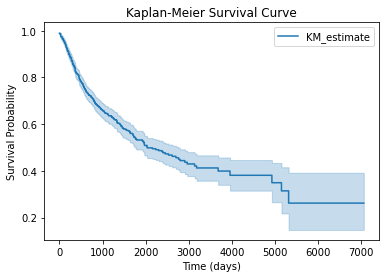

Median Survival Times:
2036.0
Kaplan-Meier Fitted Model:
<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1181 total observations, 778 right-censored observations>


In [16]:
df_diag
# kmf_exp = ...
# mean_survival_time = ...

# ##############
# your code starts here
# Answer

!pip install lifelines


import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
import matplotlib.pyplot as plt


# Perform Kaplan-Meier survival analysis
kmf_exp = KaplanMeierFitter()
data = df_diag[["OS", "OS.time"]].dropna()
kmf_exp.fit(data["OS.time"], data["OS"])

# Calculate median survival times
mean_survival_time = median_survival_times(kmf_exp)

# Plot the survival function
ax = plt.subplot(111)
kmf_exp.plot_survival_function(ax=ax)
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")

# Save the plot
plt.savefig("kaplan_meier_survival_curve.png")

# Display the plot
plt.show()

# Output the results
print("Median Survival Times:")
print(mean_survival_time)
print("Kaplan-Meier Fitted Model:")
print(kmf_exp)


# ##############

In [17]:
###### testing script ######
assert mean_survival_time == 2036.0
assert kmf_exp.percentile(0.3) == 5318.0
assert abs(kmf_exp.cumulative_density_.iloc[-1].values[0] - 0.7380019556474233) < 1e-6
############################

/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


## Q3.3 Differences in Overall Survival Based on TTN Expression Levels

Using the gene expression data `df_exp` and clinical outcome data `df_diag`, analyze the differences in overall survival between patients with higher TP53 expression and those with lower TTN expression, specifically for the cancer subtype "LAML".

Definition:
- **High TTN expression**: Patients whose TTN expression level is above the median.
- **Low TTN expression**: Patients whose TTN expression level is at or below the median.

Output Requirements:
1. Two fitted Kaplan-Meier survival models:
   - One for patients with high TTN expression, named `kmf_exp`.
   - One for patients with low TTN expression, named `kmf_control`.
2. Median survival times for both groups, named `median_survival_time_exp` and `median_survival_time_control`.
3. A plot comparing the survival functions of both groups, including at-risk counts.

Write the code to generate these outputs.

Median survival time for high TTN expression group: 489.0
Median survival time for low TTN expression group: 486.0


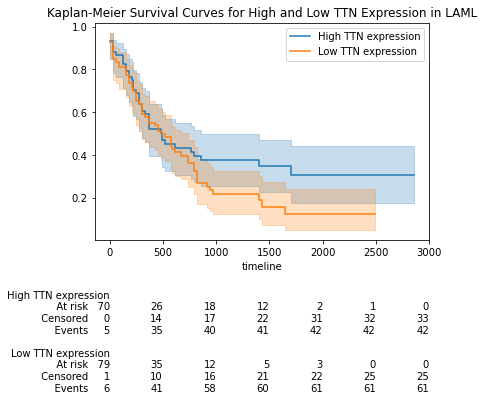

In [18]:
# kmf_exp = ...
# kmf_control = ...
# median_survival_time_exp = ...
# median_survival_time_control = ...

# ##############
# your code starts here
# Answer

# df=df_exp[["sample","TTN"]].merge(df_diag[["sample","cancer type abbreviation","OS","OS.time"]], on="sample")
# df=df.groupby("cancer type abbreviation").get_group("LAML")
# median=df["TTN"].median()
# high=df[df["TTN"]>median]
# low=df[df["TTN"]<=median]
# high=high.dropna()
# low=low.dropna()
# ###kmf_exp
# kmf_exp = KaplanMeierFitter()
# kmf_exp.fit(high["OS.time"], high["OS"])
# kmf_exp.survival_function_
# kmf_exp.plot_survival_function()
# median_survival_time_exp = kmf_exp.median_survival_time_
# #####kmf_control
# kmf_control = KaplanMeierFitter()
# kmf_control.fit(low["OS.time"], low["OS"])
# kmf_control.survival_function_
# kmf_control.plot_survival_function()
# median_survival_time_control = kmf_control.median_survival_time_




import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt


# Filter for the cancer subtype "LAML"
df_diag_laml = df_diag[df_diag["cancer type abbreviation"] == "LAML"]

# Get the sample IDs for LAML patients
pids_laml = df_diag_laml["sample"]

# Filter the gene expression data for LAML patients
df_exp_laml = df_exp[["sample", "TP53", "TTN"]]
df_exp_laml = df_exp_laml[df_exp_laml["sample"].isin(pids_laml)]

# Define high and low TTN expression groups
median_ttn = df_exp_laml["TTN"].median()
df_exp_high_ttn = df_exp_laml[df_exp_laml["TTN"] > median_ttn]
df_exp_low_ttn = df_exp_laml[df_exp_laml["TTN"] <= median_ttn]

# Get the corresponding clinical data for high and low TTN expression groups
df_diag_high_ttn = df_diag_laml[df_diag_laml["sample"].isin(df_exp_high_ttn["sample"])]
df_diag_low_ttn = df_diag_laml[df_diag_laml["sample"].isin(df_exp_low_ttn["sample"])]

# Initialize the Kaplan-Meier fitter
kmf_exp = KaplanMeierFitter()
kmf_control = KaplanMeierFitter()

# Plot the survival functions
fig, ax = plt.subplots()

# High TTN expression group
data_high_ttn = df_diag_high_ttn[["OS", "OS.time"]].dropna()
kmf_exp.fit(data_high_ttn["OS.time"], data_high_ttn["OS"], label="High TTN expression")
kmf_exp.plot_survival_function(ax=ax)
median_survival_time_exp = median_survival_times(kmf_exp)

# Low TTN expression group
data_low_ttn = df_diag_low_ttn[["OS", "OS.time"]].dropna()
kmf_control.fit(data_low_ttn["OS.time"], data_low_ttn["OS"], label="Low TTN expression")
kmf_control.plot_survival_function(ax=ax)
median_survival_time_control = median_survival_times(kmf_control)

# Add at-risk counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

# Save the plot
plt.title("Kaplan-Meier Survival Curves for High and Low TTN Expression in LAML")
plt.savefig("kaplan_meier_laml_ttn.png")

# Print median survival times
print("Median survival time for high TTN expression group:", median_survival_time_exp)
print("Median survival time for low TTN expression group:", median_survival_time_control)




# ##############

In [21]:
###### testing script ######
assert median_survival_time_exp == 489
assert median_survival_time_control == 486
assert kmf_exp.percentile(0.8) == 153
assert kmf_control.percentile(0.8) == 150
############################

/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/Users/timothyhuang/opt/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


## Q3.4 Heatmap of gene mutation and cancer subtypes
Using the mutation data `df_mutation` and clinical outcome data `df_diag`, visualize how many mutations of each gene occur in each cancer subtype. Focus on the top 10 cancer subtypes and the top 10 most prevalent gene mutations.

Output Requirements:
1. A DataFrame named `mutation_counts` with the following structure:
   - Rows: Top 10 cancer subtypes.
   - Columns: Top 10 most prevalent gene mutations.
   - Each cell contains the count of mutations for a specific gene in a specific cancer subtype.
   
   Example structure of `mutation_counts`:
   
| cancer type abbreviation   |   TP53 |   TTN |   MUC16 |   CSMD3 |   PIK3CA |   LRP1B |   RYR2 |   SYNE1 |   FLG |   PCLO |
|:---------------------------|-------:|------:|--------:|--------:|---------:|--------:|-------:|--------:|------:|-------:|
| ACC                        |     17 |    13 |      14 |       4 |        1 |       3 |      5 |       4 |     5 |      1 |
| BLCA                       |    199 |   191 |     115 |      56 |       89 |      48 |     74 |      83 |    67 |     41 |
| BRCA                       |    264 |   137 |      78 |      35 |      273 |      28 |     47 |      50 |    43 |     27 |
| CESC                       |     23 |    93 |      50 |      20 |       84 |      33 |     34 |      36 |    37 |     24 |

2. A heatmap visualizing the mutation counts across the top 10 cancer subtypes and the top 10 most prevalent genes.

              sample  LEKR1  MAFG  VWA1  TCP10L2  NEK11  DHRS4  FXYD7  \
0    TCGA-UY-A78P-01      0     0     0        0      0      0      0   
1    TCGA-DD-A4NL-01      0     0     0        0      0      0      0   
2    TCGA-F7-A624-01      0     0     0        0      0      0      0   
3    TCGA-AD-6548-01      0     0     0        0      0      0      0   
4    TCGA-CM-6165-01      0     0     0        0      0      0      0   
..               ...    ...   ...   ...      ...    ...    ...    ...   
995  TCGA-95-A4VP-01      0     0     0        0      0      0      0   
996  TCGA-CV-6433-01      0     0     0        0      0      0      0   
997  TCGA-KO-8414-01      0     0     0        0      0      0      0   
998  TCGA-EX-A8YF-01      0     0     0        0      0      0      0   
999  TCGA-EL-A4KG-01      0     0     0        0      0      0      0   

     ATP6AP1L  CARD17  ...  GJA3  DIO1  CELSR3  HECTD3  SUZ12  RCAN3  TTLL1  \
0           0       0  ...     0     0      

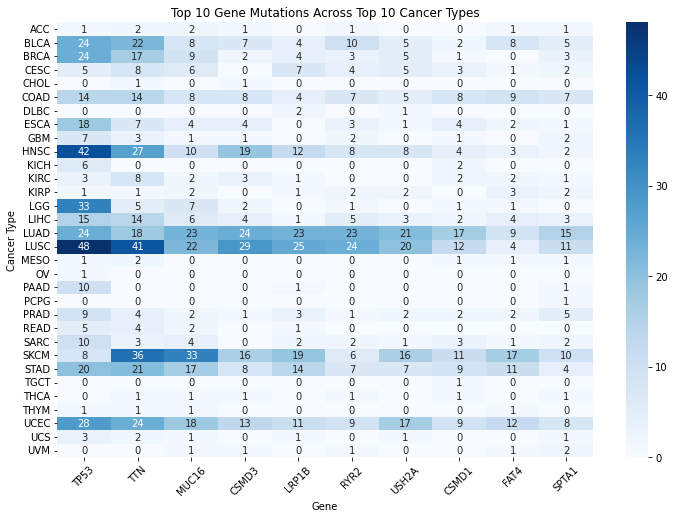

In [25]:
# mutation_counts = ...

# ##############
# your code starts here
# Answer



# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt



# !pip install seaborn
# import seaborn as sns
# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# temp=df_mutation.merge(df_diag[["sample","cancer type abbreviation"]], on ="sample",how="outer")
# print(temp)
# table=temp.groupby("cancer type abbreviation").sum()
# print(table)
# top_ten_cancer=df_diag["cancer type abbreviation"].value_counts()[:10].index
# top_ten_mutations=df_mutation.sum(axis=0)[1:].sort_values(ascending=False)[:10].index
# #temp[temp["cancer type abbreviation"]=="LAML"]
# #table=table.loc[top_ten_cancer]
# table=table[top_ten_mutations]
# mutation_counts=table.reset_index()
# heatmap_table=mutation_counts.set_index("cancer type abbreviation")
# sns.heatmap(heatmap_table,annot=True,cmap="crest")
# # ##############




# # Get the top 10 cancer subtypes
# top_cancer_subtypes = df_diag["cancer type abbreviation"].value_counts().index[:10]
# # print(top_cancer_subtypes)

# # Get the top 10 most prevalent gene mutations
# gene_mutations_count = df_mutation.drop(columns=["sample"]).sum().sort_values(ascending=False)
# top_genes = gene_mutations_count.index[:10]
# # print(top_genes)

# # Filter the mutation data for the top genes and top cancer subtypes
# df_mutation_sub = df_mutation[["sample"] + list(top_genes)]
# df_diag_sub = df_diag[df_diag["cancer type abbreviation"].isin(top_cancer_subtypes)]


# print(df_mutation_sub)
# print(df_diag_sub)

# # Merge the mutation data with the clinical data
# merged_df = df_mutation_sub.merge(df_diag_sub[["sample", "cancer type abbreviation"]], on="sample")

# print(df_mutation_sub)
# print(df_diag_sub)
# print(merged_df)

# # Group by cancer subtype and sum the mutations
# mutation_counts = merged_df.groupby("cancer type abbreviation").sum().drop(columns=["sample"])

# # Create the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(mutation_counts, annot=True, fmt="d", cmap="Blues")
# plt.title("Mutation Counts Across Top 10 Cancer Subtypes and Top 10 Genes")
# plt.ylabel("Cancer Subtype")
# plt.xlabel("Gene")
# plt.xticks(rotation=45)
# plt.savefig("mutation_counts_heatmap.png")
# plt.show()



# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# #load in tables
# df_mutations = pd.read_csv(os.path.join(data_dir, "gene_mutation_dna_sub.xena"), sep="\t")
# df_diagnosis = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome_sub.xena"), sep="\t")



# # Filter top 10 cancer types
# top_cancer_types = df_diagnosis["cancer type abbreviation"].value_counts().index[:10]

# # Filter top 10 gene mutations
# top_genes = df_mutations.drop(columns=['sample']).sum().nlargest(10).index

# # Filter the dataframes
# df_diagnosis_filtered = df_diagnosis[df_diagnosis['cancer type abbreviation'].isin(top_cancer_types)]
# df_mutations_filtered = df_mutations[['sample'] + list(top_genes)]

# print(df_mutations_filtered)

# # Merge the dataframes
# merged_df = df_mutations_filtered.merge(df_diagnosis_filtered[['sample', 'cancer type abbreviation']], on='sample',how = "outer")

# #print(df_diagnosis_filtered)

# print(merged_df)

# # Group by cancer type and sum the mutations
# mutation_counts = merged_df.groupby('cancer type abbreviation').sum().drop(columns=['sample'])

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(mutation_counts, annot=True, fmt="d", cmap='Blues')
# plt.title('Top 10 Gene Mutations Across Top 10 Cancer Types')
# plt.ylabel('Cancer Type')
# plt.xlabel('Gene')
# plt.xticks(rotation=45)
# plt.savefig("mutation_counts_heatmap.png")
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load in tables

df_diagnosis = pd.read_csv(os.path.join(data_dir, "diagnosis_outcome_sub.xena"), sep="\t")
df_mutation=df_mutation.set_index("sample").T.reset_index(names="sample")

# Merge the dataframes
merged_df = df_mutation.merge(df_diag[['sample', 'cancer type abbreviation']], on='sample')
print(merged_df)

# Filter top 10 cancer types
top_cancer_types = df_diagnosis["cancer type abbreviation"].value_counts().index[:10]

# Filter top 10 gene mutations
top_genes = df_mutation.set_index("sample").sum(axis=1).nlargest(10).index

# Filter the dataframes
#temp=merged_df[merged_df["cancer type abbreviation"].isin(top_ten_cancer)]
temp=merged_df[['TP53', 'TTN', 'MUC16', 'CSMD3', 'LRP1B', 'RYR2', 'USH2A', 'CSMD1',
       'FAT4', 'SPTA1',"cancer type abbreviation"]]
mutation_countss=temp.groupby("cancer type abbreviation").sum()

mutation_counts=temp.groupby("cancer type abbreviation").sum().reset_index()

#merged_df=merged_df[merged_df["cancer type abbreviation"].isin(top_cancer_types)]



# Group by cancer type and sum the mutations
#mutation_counts = merged_df.groupby('cancer type abbreviation').sum().drop(columns=['sample'])

# Plot the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(mutation_countss, annot=True, cmap='Blues')
plt.title('Top 10 Gene Mutations Across Top 10 Cancer Types')
plt.ylabel('Cancer Type')
plt.xlabel('Gene')
plt.xticks(rotation=45)
#plt.savefig("mutation_counts_heatmap.png")
plt.show()

# ##############

In [23]:
###### testing script ######
assert len(mutation_counts) == 32
assert len(mutation_counts.columns) == 11
assert mutation_counts[mutation_counts["cancer type abbreviation"] == "ACC"][['TP53','TTN','MUC16','CSMD3']].iloc[0].tolist() == [1, 2, 2, 1]
############################